In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Load the data

In [98]:
from sklearn.model_selection import train_test_split
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

data = pd.concat([train, test]).reset_index()
data.drop('index', axis=1, inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)

print(data.head())
X, y = data[['hr', 'x', 'y', 'z']], data['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sleep/Wake classification
# 0 if awake, 1 otherwise
y_train_sw = [0 if x == -1 else 1 for x in y_train]
y_test_sw = [0 if x == -1 else 1 for x in y_test]

   timestamp    hr         x         y         z  labels
0    5.16105  77.0 -0.865297 -0.071364 -0.464401      -1
1   10.16105  77.0 -0.957725 -0.066915 -0.222599      -1
2   11.16105  78.0 -0.589195 -0.348735 -0.688189      -1
3   20.16102  78.0 -0.542033 -0.346615 -0.763253      -1
4   25.16105  76.0 -0.541780 -0.345169 -0.764195      -1


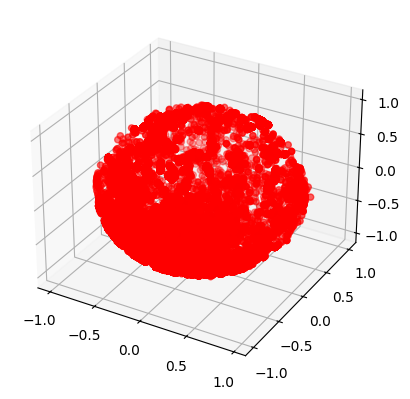

In [99]:
# 3D plot with the first 3 features
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(train['x'], train['y'], train['z'], c='r', marker='o')
plt.show()

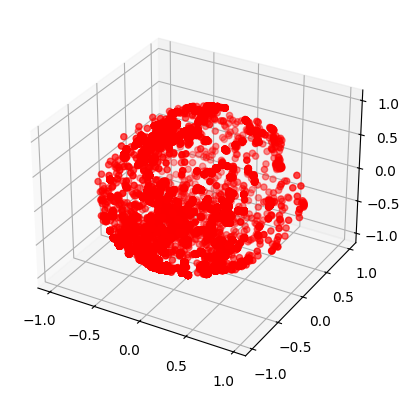

In [100]:
# 3D plot with the first 3 features
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(test['x'], test['y'], test['z'], c='r', marker='o')
plt.show()

1: [[  416   199]
 [  115 31640]]
1: 0.9902996601791783
6: [[  295   320]
 [  125 31630]]
6: 0.986252703120173
11: [[  171   444]
 [   55 31700]]
11: 0.9845844918134075
16: [[  127   488]
 [   46 31709]]
16: 0.9835032437442076
21: [[   84   531]
 [   18 31737]]
21: 0.9830398517145505
26: [[   58   557]
 [   15 31740]]
26: 0.9823293172690764
31: [[   28   587]
 [    6 31749]]
31: 0.9816805684275564
36: [[   19   596]
 [    4 31751]]
36: 0.9814643188137164
41: [[   18   597]
 [    3 31752]]
41: 0.9814643188137164
46: [[   12   603]
 [    5 31750]]
46: 0.9812171763978993


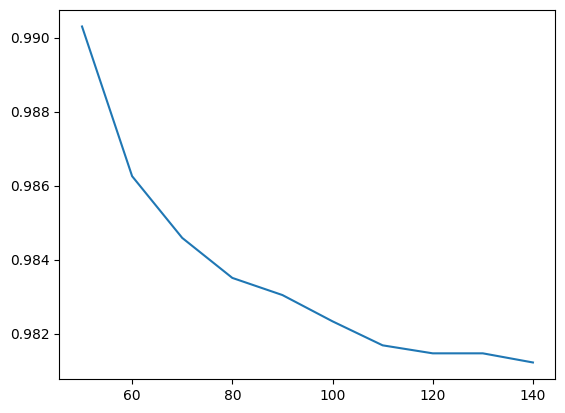

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

accuracy = []
for i in range(1, 50, 5):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
    knn.fit(X_train, y_train_sw)

    y_pred = knn.predict(X_test)
    confusion_matrix_ = confusion_matrix(y_test_sw, y_pred)
    print(f'{i}: {confusion_matrix_}')
    accuracy_ = np.mean(y_pred == y_test_sw)
    accuracy.append(accuracy_)
    print(f'{i}: {accuracy_}')


plt.plot(range(50, 150, 10), accuracy)

1: [[  416    61    28    57     6     1    46]
 [   54  2880   147   214    27     4   140]
 [   16   118  1918   329    12     2    91]
 [   18   106   254 14087   178     9   203]
 [    7    12     8   195  3080    27     8]
 [    1     2     1     9    17   366     3]
 [   19    96    57   235    10     3  6792]]
1: 0.9125424776027186
2: [[  448    61    29    49     5     0    23]
 [   91  2934   136   182    19     2   102]
 [   23   235  1899   263    10     1    55]
 [   35   199   492 13886   101     6   136]
 [   11    24    17   312  2952    16     5]
 [    2     5     1    22    32   334     3]
 [   36   211   138   430    19     5  6373]]
2: 0.8905159097930182
3: [[  380    70    30    69    10     1    55]
 [   73  2699   154   298    45     5   192]
 [   29   209  1627   475    14     2   130]
 [   34   160   272 13872   222     7   288]
 [    8    17    13   233  3025    28    13]
 [    2     4     2    20    12   355     4]
 [   34   176   107   338    20     5  6532]]

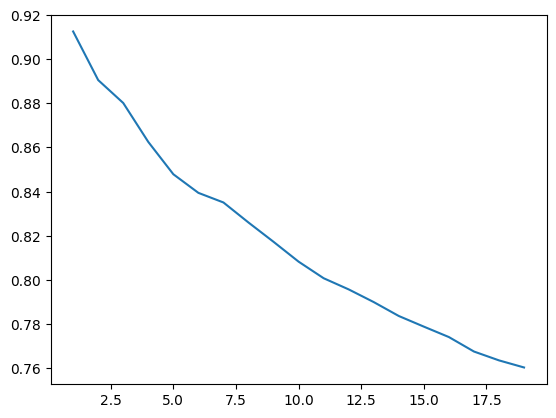

In [157]:
# Sleep stage classification

accuracy = []
for i in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=i, algorithm='ball_tree')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    confusion_matrix_ = confusion_matrix(y_test, y_pred)
    print(f'{i}: {confusion_matrix_}')
    accuracy_ = np.mean(y_test == y_pred)
    accuracy.append(accuracy_)
    print(f'{i}: {accuracy_}')
    
plt.plot(range(1, 20, 1), accuracy)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_trans, y_train_sw)

y_pred = logisticRegr.predict(X_test_trans)
confusion_matrix_ = confusion_matrix(y_test_sw, y_pred)
print(f'{confusion_matrix_}')
accuracy_ = np.mean(y_pred == y_test_sw)
print(f'{accuracy_}')


[[    0   615]
 [    4 31751]]
0.9808773555761507


In [109]:
# for logistic regression and sleep stage classification

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_trans, y_train)

y_pred = logisticRegr.predict(X_test_trans)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(f'{confusion_matrix_}')
accuracy_ = np.mean(y_pred == y_test)
print(f'{accuracy_}')

[[   22     0     0   532     3     3    55]
 [   17     0     0  3275    43     3   128]
 [    5     0     0  2406    14     0    61]
 [    0     0     0 14610    23     0   222]
 [    0     0     0  3189     0     0   148]
 [    0     0     0   356     1     0    42]
 [    2     0     0  7059    10     0   141]]
0.4563793636082793


In [153]:
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

logisticRegrSW = LogisticRegression()
logisticRegrSW.fit(X_train_trans, y_train_sw)

y_train_sw = np.array(y_train_sw)
y_test_sw = np.array(y_test_sw)

# Using boolean arrays to index with .iloc
X_train_sleep = X_train.loc[y_train_sw == 1]
y_train_sleep = y_train.loc[y_train_sw == 1]
print(y_train_sleep.unique())
X_test_sleep = X_test.loc[y_test_sw == 1]
y_test_sleep = y_test.loc[y_test_sw == 1]
print(y_test_sleep.unique())

X_train_sleep = scaler.transform(X_train_sleep)
X_test_sleep = scaler.transform(X_test_sleep)

logisticRegrSleep = LogisticRegression()
logisticRegrSleep.fit(X_train_sleep, y_train_sleep)

y_pred_sw = logisticRegrSW.predict(X_test_trans)
y_pred_sleep = logisticRegrSleep.predict(X_test_sleep)

print(f'Sleep/Wake classification: {accuracy_score(y_test_sw, y_pred_sw)}')
print(f'Sleep stage classification: {accuracy_score(y_test_sleep, y_pred_sleep)}')

[1 2 3 5 4 0]
[2 3 5 1 0 4]
Sleep/Wake classification: 0.9808773555761507
Sleep stage classification: 0.46477720044087545


In [156]:
def classify_sleep_data(new_data) -> int:
    X_new = scaler.transform(new_data.reshape(1, -1))
    awake_sleep_pred = logisticRegrSW.predict(X_new)
    if awake_sleep_pred == 0:  # The subject is awake
        return -1
    else:  # The subject is asleep
        sleep_phase_pred = logisticRegrSleep.predict(X_new)
        return sleep_phase_pred[0]
    
import warnings
warnings.filterwarnings('ignore', message="X does not have valid feature names")
y_pred = []    
for record in X_test.values:
    y_pred.append(classify_sleep_data(record))

print(y_test.shape, len(y_pred))
print(y_test.unique(), np.unique(y_pred))
print(f'Sleep stage classification: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

(32370,) 32370
[ 2  3  5  1  0 -1  4] [-1  2  3  4  5]
Sleep stage classification: 0.45594686438059934
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       615
           0       1.00      0.00      0.00      3466
           1       1.00      0.00      0.00      2486
           2       0.47      0.98      0.63     14855
           3       0.00      0.00      0.00      3337
           4       0.00      0.00      0.00       399
           5       0.18      0.02      0.04      7212

    accuracy                           0.46     32370
   macro avg       0.38      0.14      0.10     32370
weighted avg       0.44      0.46      0.30     32370


In [158]:
#random forest with sleep/wake classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train_sw)

y_pred = rf.predict(X_test)
print(f'Sleep/Wake classification: {accuracy_score(y_test_sw, y_pred)}')
print(classification_report(y_test_sw, y_pred, zero_division=1))

Sleep/Wake classification: 0.9810009267840594
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       615
           1       0.98      1.00      0.99     31755

    accuracy                           0.98     32370
   macro avg       0.99      0.50      0.50     32370
weighted avg       0.98      0.98      0.97     32370


20: 0.9350942230460303
              precision    recall  f1-score   support

          -1       0.91      0.70      0.79       615
           0       0.91      0.88      0.90      3466
           1       0.89      0.75      0.82      2486
           2       0.93      0.97      0.95     14855
           3       0.96      0.92      0.94      3337
           4       0.91      0.93      0.92       399
           5       0.96      0.97      0.96      7212

    accuracy                           0.94     32370
   macro avg       0.92      0.88      0.90     32370
weighted avg       0.93      0.94      0.93     32370
21: 0.9381835032437442
              precision    recall  f1-score   support

          -1       0.91      0.71      0.80       615
           0       0.91      0.89      0.90      3466
           1       0.88      0.77      0.83      2486
           2       0.94      0.97      0.96     14855
           3       0.96      0.93      0.94      3337
           4       0.91      0.93

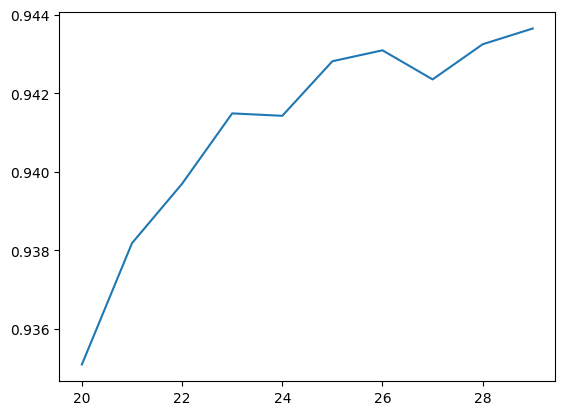

In [164]:
#random forest with sleep stage classification

acc = []
for i in range(20, 30, 1):
    rf = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    print(f'{i}: {accuracy_score(y_test, y_pred)}')
    acc.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))


plt.plot(range(20, 30, 1), acc)
plt.show()

In [165]:
rf = RandomForestClassifier(n_estimators=100, max_depth=23, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f'{23}: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred, zero_division=1))

29: 0.9414890330552981
              precision    recall  f1-score   support

          -1       0.90      0.74      0.81       615
           0       0.91      0.89      0.90      3466
           1       0.88      0.80      0.84      2486
           2       0.95      0.97      0.96     14855
           3       0.96      0.93      0.94      3337
           4       0.91      0.92      0.91       399
           5       0.96      0.97      0.97      7212

    accuracy                           0.94     32370
   macro avg       0.92      0.89      0.91     32370
weighted avg       0.94      0.94      0.94     32370
